In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import numpy as np

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [7]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [9]:
print(f"Eğitim Verilerinin Sayısı ve Boyutu = {x_train.shape}")
print(f"Test Verilerinin Sayısı ve Boyutu = {x_test.shape}")

Eğitim Verilerinin Sayısı ve Boyutu = (60000, 28, 28, 1)
Test Verilerinin Sayısı ve Boyutu = (10000, 28, 28, 1)


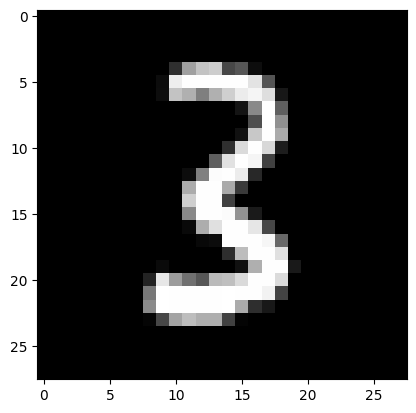

In [21]:
plt.imshow(x_train[50000],cmap="gray")

In [25]:
y_train[50000]

3

In [27]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [39]:
X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify = y_train
)


In [41]:
print(f"Eğitim (Train) Verilerinin Son Hali = {X_train.shape}")
print(f"Doğrulama (Val) Verilerinin Son Hali = {X_val.shape}")


Eğitim (Train) Verilerinin Son Hali = (48000, 28, 28, 1)
Doğrulama (Val) Verilerinin Son Hali = (12000, 28, 28, 1)


In [51]:
model = keras.Sequential([
    #ilk konvolüsyon blok
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
       keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
       
    
    #ikinci
        keras.layers.Conv2D(64, (3,3), activation='relu'), 
    keras.layers.BatchNormalization(),
       keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    #yapay sinir ağı modelini tanımlıyoruz
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
   
    
])

In [53]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'my_cnn_model_for_MMIST_dataset.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [57]:
print("MODEL ÇALIİTIRILIYOR")
history = model.fit(
    X_train, y_train_split, validation_data=(X_val, y_val),
    batch_size=128, epochs=10, callbacks=model_checkpoint, verbose=1
)

MODEL ÇALIİTIRILIYOR
Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9577
Epoch 1: val_accuracy improved from -inf to 0.12400, saving model to my_cnn_model_for_MMIST_dataset.h5
375/375 [==============================] - 32s 84ms/step - loss: 0.1353 - accuracy: 0.9577 - val_loss: 8.7759 - val_accuracy: 0.1240
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9852
Epoch 2: val_accuracy improved from 0.12400 to 0.98625, saving model to my_cnn_model_for_MMIST_dataset.h5
375/375 [==============================] - 32s 84ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0448 - val_accuracy: 0.9862
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9887
Epoch 3: val_accuracy improved from 0.98625 to 0.98917, saving model to my_cnn_model_for_MMIST_dataset.h5
375/375 [==============================] - 31s 84ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0352 

In [59]:
print("model, test verisi üzerinde değerlendiriliyor:")
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"test verisinin loss değeri = {test_loss}")
print(f"test verisinin accuracy değeri={test_accuracy}")

model, test verisi üzerinde değerlendiriliyor:
313/313 [==============================] - 2s 7ms/step - loss: 0.0298 - accuracy: 0.9922
test verisinin loss değeri = 0.029782360419631004
test verisinin accuracy değeri=0.9922000169754028


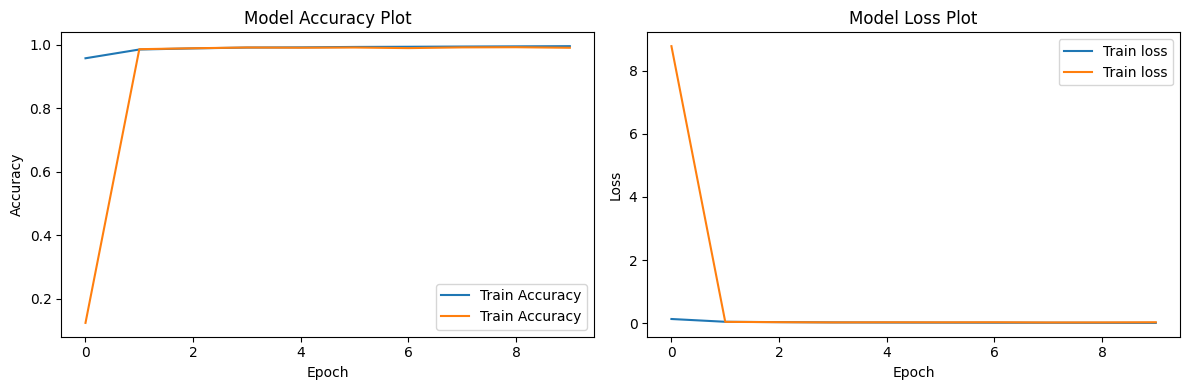

In [67]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Train Accuracy')
plt.title('Model Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Train loss')
plt.title('Model Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [69]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [71]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


313/313 [==============================] - 2s 7ms/step


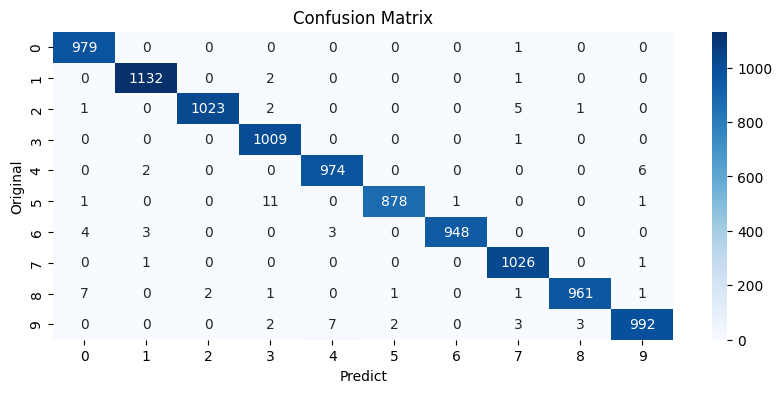

In [73]:
cm =confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Original')
plt.show()